DESCRIPTION:
Write a method that takes a field for well-known board game "Battleship" as an argument and returns true if it has a valid disposition of ships, false otherwise. Argument is guaranteed to be 10*10 two-dimension array. Elements in the array are numbers, 0 if the cell is free and 1 if occupied by ship.

Battleship (also Battleships or Sea Battle) is a guessing game for two players. Each player has a 10x10 grid containing several "ships" and objective is to destroy enemy's forces by targetting individual cells on his field. The ship occupies one or more cells in the grid. Size and number of ships may differ from version to version. In this kata we will use Soviet/Russian version of the ga

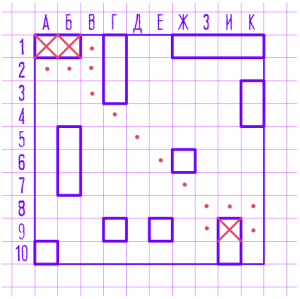

Before the game begins, players set up the board and place the ships accordingly to the following rules:
There must be single battleship (size of 4 cells), 2 cruisers (size 3), 3 destroyers (size 2) and 4 submarines (size 1). Any additional ships are not allowed, as well as missing ships
.
Each ship must be a straight line, except for submarines, which are just single cel

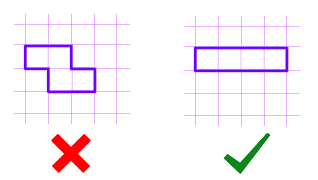l.

The ship cannot overlap or be in contact with any other ship, neither by edge nor by corn
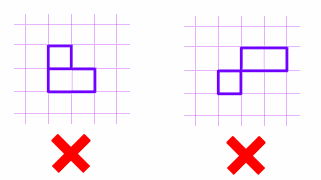er.
me.

In [ ]:
def bad_2x2_field(sq):
    bads = [
        [[1,1],
         [1,1]],
        [[1,1],
         [1,0]],
        [[1,1],
         [0,1]],
        [[0,1],
         [1,1]],
        [[1,0],
         [1,1]],
        [[0,1],
         [1,0]],
        [[1,0],
         [0,1]]
    ]
    for bad in bads:
        if sq == bad:
            return True
    return False

def validate_battlefield(field):
    if sum([sum(f) for f in field]) != 20:
        return False
    dots = []
    ships = {4: 1, 3: 2, 2: 3, 1: 4}
    for i in range(9):
        for j in range(9):
            if bad_2x2_field([[field[i][j]  ,field[i][j+1]],
                              [field[i+1][j],field[i+1][j+1]]]):
                return False
            if field[i][j] and (i,j) not in dots:
                dots.append((i,j))
                count = 1
                while i+count < 10 and field[i+count][j]:
                    dots.append((i+count,j))
                    count += 1
                if count > 1:
                    if count not in ships:
                        return False
                    ships[count] -= 1
                    if ships[count] < 0:
                        return False
                    continue
                while j+count < 10 and field[i][j+count]:
                    dots.append((i,j+count))
                    count += 1
                if count not in ships:
                    return False
                ships[count] -= 1
                if ships[count] < 0:
                    return False
    else:
	    return True